In [18]:
import pandas as pd
import numpy as np
import json
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from tensorflow import keras

In [19]:
x_src_path = '../Dataset/assignment1New.json'
y_src_path = '../DataBook/Assignment1_Data_Analyst.xlsx'

In [20]:
data = pd.read_json(x_src_path)

In [21]:
df_supervision = pd.read_excel(y_src_path)
plagiarised_array = df_supervision['Plagiarised'].astype(int).values

In [22]:
X = np.nan_to_num(data.values, nan=0, copy=True).astype(int)
y = plagiarised_array

False

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)
#seed 32 results 100% on test score

In [25]:
p = Perceptron()
p.fit(X_train,y_train)

print(f"Training data score: {p.score(X_train, y_train)}")
print(f"Test data score: {p.score(X_test, y_test)}")

Training data score: 1.0
Test data score: 0.9090909090909091


In [26]:
# predictions = p.predict(X_test)
# for i in range(len(X_test)):
#     print("Predicted:", predictions[i], "Actual:", y_test[i])

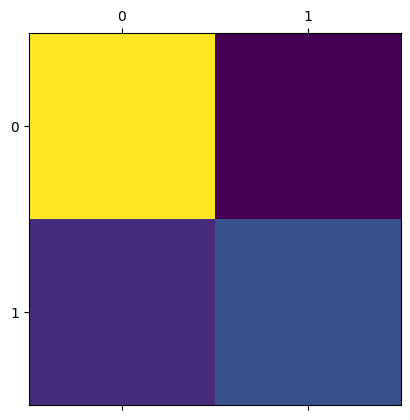

In [27]:
cm = confusion_matrix( p.predict(X_test), y_test)
# plt.set_cmap()
plt.matshow(cm)

In [28]:

model = keras.models.Sequential([
    keras.layers.Input(shape=(33813,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

LOSS_FN = keras.losses.sparse_categorical_crossentropy

model.compile(optimizer='adam',loss=LOSS_FN,metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
2/2 [==============================] - 0s 152ms/step - loss: 1232.8412 - accuracy: 0.3953 - val_loss: 1469.7690 - val_accuracy: 0.9091
Epoch 2/10
2/2 [==============================] - 0s 31ms/step - loss: 2417.0715 - accuracy: 0.8605 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
2/2 [==============================] - 0s 44ms/step - loss: 3041.0320 - accuracy: 0.7674 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
2/2 [==============================] - 0s 39ms/step - loss: 246.2966 - accuracy: 0.9070 - val_loss: 1514.4718 - val_accuracy: 0.9091
Epoch 5/10
2/2 [==============================] - 0s 36ms/step - loss: 2222.0793 - accuracy: 0.9070 - val_loss: 2147.4324 - val_accuracy: 0.9091
Epoch 6/10
2/2 [==============================] - 0s 29ms/step - loss: 1134.3042 - accuracy: 0.9302 - val_loss: 2698.4629 - val_accuracy: 0.8182
Epoch 7/10
2/2 [==============================] - 0s 47ms/step - loss: 467.8019 - accuracy: 0.8837 - val_loss: 2979.7053 - val_a